In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
def get_c(a):
    return (-(a)**2+2*(a**2)*np.log(a)+1)/(1+(a)**2-2*a)

def g(f, c, zeta):
    if zeta > 0:
        return -np.sqrt((c-1-2*f*c+(f**2)*(c+1-2*np.log(f)))/c)
    if zeta < 0:
        return np.sqrt((c-1-2*f*c+(f**2)*(c+1-2*np.log(f)))/c)
    
def eulers(df, a, zeta_0, tol=1e-3):
    n = int(np.ceil((a-tol)/df))
    c = get_c(a)
    f = np.linspace(1+tol, a, n)
    
    zeta = df/g(f, c, zeta_0)
    zeta[0] = zeta_0
    zeta = np.cumsum(zeta)
    zeta -= np.min(zeta[:-1])
        
    return f, np.array(zeta)

In [3]:
f_right, zeta_right = eulers(1e-3, 10, 100)
f_left, zeta_left = f_right, - zeta_right

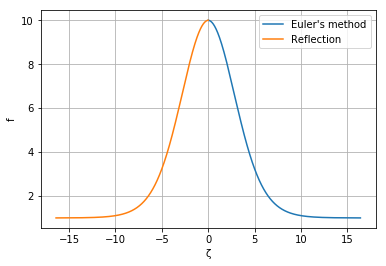

In [4]:
plt.plot(zeta_right[:-1], f_right[:-1], label="Euler's method")
plt.plot(zeta_left[:-1], f_left[:-1], label="Reflection")
# plt.title("Numeric solution using Euler's method, a=10, δ=1e-4")
plt.ylabel("f")
plt.xlabel("ζ")
plt.grid()
plt.legend()
plt.savefig("img/soln.png", dpi=300)

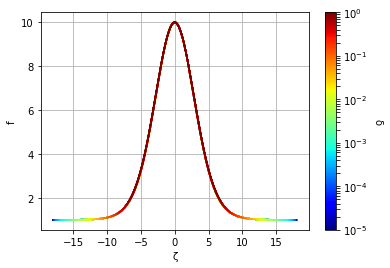

In [5]:
n = 100
tols = np.geomspace(1e-5, 0.99-1e-5, n)
colors = cm.jet(np.linspace(0, 1, n))
for c, tol in zip(colors, tols):
    f_right, zeta_right = eulers(1e-3, 10, 100, tol=tol)
    f_left, zeta_left = f_right, - zeta_right
    plt.plot(zeta_right[:-1], f_right[:-1], c=c)
    plt.plot(zeta_left[:-1], f_left[:-1], c=c)

sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=mpl.colors.LogNorm(vmin=1e-5, vmax=1))
sm._A = []
cbar = plt.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('δ', rotation=270)
# plt.title("Numeric solution using Euler's method, a=10, ∆f=1e-3")
plt.ylabel("f")
plt.xlabel("ζ")
plt.grid()
plt.savefig("img/soln_tols.png", dpi=300)

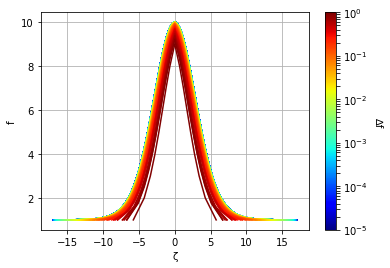

In [6]:
n = 100
dfs = np.geomspace(1e-5, 1, n)
colors = cm.jet(np.linspace(0, 1, n))
for c, df in zip(colors, dfs):
    f_right, zeta_right = eulers(df, 10, 100)
    f_left, zeta_left = f_right, - zeta_right
    plt.plot(zeta_right[:-1], f_right[:-1], c=c)
    plt.plot(zeta_left[:-1], f_left[:-1], c=c)

sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=mpl.colors.LogNorm(vmin=1e-5, vmax=1))
sm._A = []
cbar = plt.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('∆f', rotation=270)
# plt.title("Numeric solution using Euler's method, a=10, δ=1e-3")
plt.ylabel("f")
plt.xlabel("ζ")
plt.grid()
plt.savefig("img/soln_dfs.png", dpi=300)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


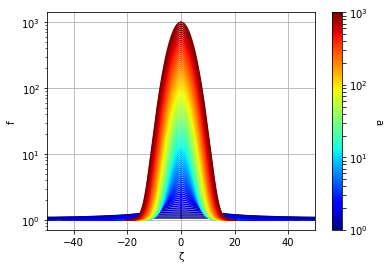

In [7]:
n = 100
A = np.geomspace(1+1e-5, 1000, n)
colors = cm.jet(np.linspace(0, 1, n))
for c, a in zip(colors, A):
    f_right, zeta_right = eulers(1e-3, a, 100)
    f_left, zeta_left = f_right, - zeta_right
    plt.plot(zeta_right[:-1], f_right[:-1], c=c)
    plt.plot(zeta_left[:-1], f_left[:-1], c=c)

sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=mpl.colors.LogNorm(vmin=1, vmax=1000))
sm._A = []
cbar = plt.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('a', rotation=270)
# plt.title("Numeric solution using Euler's method, ∆f=1e-3, δ=1e-3")
plt.ylabel("f")
plt.xlabel("ζ")
ax = plt.gca()
ax.set_yscale('log')
plt.xlim((-50, 50))
plt.grid()
plt.savefig("img/soln_as.png", dpi=300)